In [2]:
import pandas as pd

In [3]:
df_file = pd.read_csv('kikuchiacademy_high2.csv')
df_file.head(3)

,name,text
0,数学II｜微分積分｜01｜極限値（高校数学・大学受験）,はいえーみなさんこんにちは数学微分積分の第1回目の講義になります\n今日勉強していくのはこち...
1,数学II｜微分積分｜02｜平均変化率（高校数学・大学受験）,はいみなさんこんにちは\n数学微分積分の第1回目の講義になります\n超便超していくのは\nこ...
2,数学II｜微分積分｜03｜微分係数（高校数学・大学受験）,みなさんこんにちは数学微分積分の第3回目の好機になります\n今日勉強していくのはて\nこちら...


In [4]:
text = df_file.text
text_list = text.tolist()
type(text_list[0])

str

In [5]:
text_lists = []

# \nを消す
for text in text_list:
    tmp = text.replace('\n', '')
    text_lists.append(tmp)
    
#text_lists

In [6]:
text_str = "".join(text_lists)

text_file = 'kikuchiacademy.txt'

with open(text_file, "w") as f:
    f.write(text_str)

#text_str

In [7]:
import MeCab
import re

tagger = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
parsed = tagger.parse(text_str)
lines = parsed.split('\n')
lines = lines[0:-2]
#print(lines)
word_list = []

for line in lines:
    tmp = re.split('\t|,', line)
    #print(tmp)
    if tmp[1] in ["名詞", "動詞", "形容詞"]:
        word_list.append(tmp[7])

#print(word_list)

text_file = 'toaru_math_high2_wakati.txt'

with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write(" ".join(word_list))


In [8]:
with open(text_file, "r") as tf:
    lines = tf.read().split(' ')

stop_words = [ u'それ',u'これ', u'ここ', u'の', u'時', u'ん', u'こっち', u'マイナス', u'こと', u'ゼロ', u'さん', 
             u'よう', u'する', u'てる', u'なる', u'ある', u'いる',  u'やる', u'いく', 
             u'いう', u'言う', u'よい', u'良い', u'いい', u'ない',u'やすい',u'ほしい']

words_list = [x for x in lines if x not in stop_words]

text_file = 'toaru_math_high2_stop.txt'

with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write(" ".join(word_list))

In [9]:
from gensim.models import word2vec

data = word2vec.LineSentence(text_file)
model = word2vec.Word2Vec(data, vector_size=200, window=3, min_count=5, sg=1, epochs=300)

In [9]:
print(model.__dict__['wv']["微分"])

[-0.08439366  0.18715335 -0.31237838 -0.4070697  -0.1154177  -0.02372531
  0.3147061   0.2697047  -0.2177821  -0.08114984  0.6480555   0.25494236
  0.37447226  0.01392095  0.12437666  0.2539646  -0.15775862 -0.0156327
 -0.29159245  0.12737888  0.03602055  0.01671758  0.6598965  -0.14657114
  0.17774288 -0.17093892 -0.23686752 -0.01416805  0.34406543  0.66257066
 -0.15214747 -0.45524105  0.2757731  -0.13744108  0.6518879   0.34706172
  0.4427391   0.33372143 -0.21514413 -0.10138156 -0.22751023 -0.380497
 -0.14672123  0.20290616  0.0694273   0.06131872 -0.21906221  0.21902692
 -0.31060094 -0.04104367 -0.4331715   0.06508325 -0.316225    0.02901366
 -0.25404567  0.11933799  0.07903457  0.01496399 -0.7062616  -0.15034711
 -0.36919907 -0.6606061  -0.1481457   0.6342044   0.01698529  0.00401439
  0.02026289 -0.6089015  -0.118606   -0.23382993 -0.6336588   0.14570048
  0.23596536  0.223086    0.08768277 -0.717072    0.16074142  0.15325814
 -0.3552537  -0.1194018  -0.13143298 -0.11126307 -0.08

In [10]:
model.wv.similarity("微分", "積分")

KeyError: "Key '積分' not present"

In [11]:
model.wv.most_similar(['微分'])

[('二分', 0.35572922229766846),
 ('自分', 0.3361995220184326),
 ('細かい', 0.3057926297187805),
 ('導関数', 0.29597175121307373),
 ('整理', 0.2752842307090759),
 ('くれる', 0.27331024408340454),
 ('ケース', 0.2730694115161896),
 ('分ける', 0.2715640664100647),
 ('ルール', 0.27054786682128906),
 ('結局', 0.26607105135917664)]

In [20]:
model.wv.most_similar(positive=['微分'])

[('積分', 0.27493682503700256),
 ('微分係数', 0.2691125273704529),
 ('話', 0.2481280416250229),
 ('一致', 0.248093381524086),
 ('する', 0.2456987500190735),
 ('ややこしい', 0.2433188408613205),
 ('FX', 0.23700259625911713),
 ('ラッシュ', 0.2333376705646515),
 ('札', 0.23279356956481934),
 ('分の', 0.23221580684185028)]

In [21]:
model.wv.most_similar(negative=['微分'])

[('ギリギリ', 0.07210024446249008),
 ('下', 0.06335872411727905),
 ('調べる', 0.06335373222827911),
 ('切れる', 0.05758646875619888),
 ('得る', 0.05680358409881592),
 ('はず', 0.04539894685149193),
 ('ちる', 0.042166367173194885),
 ('すぎる', 0.041545264422893524),
 ('チェック', 0.03970177471637726),
 ('あここ。', 0.03950200974941254)]

In [22]:
model.wv.most_similar(positive=['積分'])

[('席', 0.41891855001449585),
 ('微分・積分', 0.38878971338272095),
 ('気分', 0.35020679235458374),
 ('丸', 0.33946624398231506),
 ('観る', 0.32824039459228516),
 ('なさる', 0.3156711757183075),
 ('底', 0.29895246028900146),
 ('数理', 0.29642584919929504),
 ('タイトル', 0.29013124108314514),
 ('いち', 0.2889572083950043)]

In [23]:
model.wv.most_similar(positive=['微分', '積分']) # 微分+積分

[('微分・積分', 0.37482455372810364),
 ('微分係数', 0.3458663821220398),
 ('席', 0.3412114679813385),
 ('ややこしい', 0.32117265462875366),
 ('気分', 0.31865087151527405),
 ('ルール', 0.3172301650047302),
 ('観る', 0.30929774045944214),
 ('その後', 0.30062419176101685),
 ('丸', 0.29783374071121216),
 ('不等式', 0.2932875454425812)]

In [12]:
model.wv.most_similar(['グラフ'])

[('表', 0.2926362454891205),
 ('増加', 0.27200013399124146),
 ('確認', 0.26602703332901),
 ('曲', 0.2629854083061218),
 ('あたり', 0.26142433285713196),
 ('左', 0.256904661655426),
 ('最小', 0.2554611563682556),
 ('者', 0.25105616450309753),
 ('患者', 0.25020620226860046),
 ('書ける', 0.2386971116065979)]

In [13]:
model.wv.most_similar(positive=['数学'])

[('みなさん', 0.3989984691143036),
 ('微分・積分', 0.3773290812969208),
 ('はず', 0.3478487432003021),
 ('1回目', 0.3399965167045593),
 ('多い', 0.3289274573326111),
 ('良い', 0.3219640851020813),
 ('人', 0.313902348279953),
 ('因数', 0.2972472012042999),
 ('かっこいい', 0.2918347716331482),
 ('買う', 0.28783631324768066)]

In [14]:
model.wv.most_similar(positive=['高校'])

[('右側', 0.3697760999202728),
 ('処理', 0.3437296152114868),
 ('個', 0.3433646261692047),
 ('自分', 0.3413744568824768),
 ('底', 0.3402099311351776),
 ('一つ一つ', 0.3177368938922882),
 ('プラス', 0.30314013361930847),
 ('地点', 0.3015865385532379),
 ('近づける', 0.2990848124027252),
 ('COCO', 0.2970457673072815)]

In [15]:
model.wv.most_similar(positive=['関数'])

[('3次', 0.37524184584617615),
 ('決定', 0.36695045232772827),
 ('トイ', 0.3280194103717804),
 ('感想', 0.31281474232673645),
 ('増減', 0.30861029028892517),
 ('患者', 0.29056310653686523),
 ('導く', 0.28541579842567444),
 ('調べる', 0.2852820158004761),
 ('表', 0.2784276604652405),
 ('参上', 0.27805057168006897)]

In [16]:
model.wv.most_similar(positive=['覚える'])

[('細い', 0.3363870680332184),
 ('もらう', 0.3351786732673645),
 ('指数', 0.31716644763946533),
 ('ルール', 0.3146246373653412),
 ('回', 0.3008738160133362),
 ('磨く', 0.2950468063354492),
 ('多い', 0.28809303045272827),
 ('度', 0.28804418444633484),
 ('言葉', 0.2867663502693176),
 ('読む', 0.28516247868537903)]

In [17]:
model.wv.most_similar(['変化'])

[('量', 0.5882117748260498),
 ('平均', 0.5795316100120544),
 ('率', 0.5154334306716919),
 ('変化率', 0.4528530240058899),
 ('近づける', 0.35959872603416443),
 ('はず', 0.35203319787979126),
 ('大体', 0.33756643533706665),
 ('結ぶ', 0.30649739503860474),
 ('細かい', 0.30571678280830383),
 ('レベル', 0.30544784665107727)]

In [18]:
model.wv.most_similar(['勉強'])

[('微分・積分', 0.4515591859817505),
 ('先', 0.3681831955909729),
 ('考え方', 0.3317635953426361),
 ('みなさん', 0.30805888772010803),
 ('作業', 0.30644962191581726),
 ('難しい', 0.2731199562549591),
 ('講義', 0.27227309346199036),
 ('同様', 0.27163007855415344),
 ('やり方', 0.26988041400909424),
 ('1回目', 0.2689141035079956)]

In [19]:
# model.wv.most_similar(positive=[word])で出力させる値を同じ
model.wv.similarity('覚える', '公式')

0.02603544

In [20]:
math = model.predict_output_word(['係数'])
print(math)

[('RIVEN', 0.07339681), ('係数', 0.035605956), ('処理', 0.035176076), ('手', 0.025398353), ('日本語', 0.0231198), ('指数', 0.021791497), ('号', 0.021783024), ('分', 0.02001724), ('道', 0.017966747), ('繰り返す', 0.017770318)]


In [18]:
word = '長ったらしい'
bibun = model.wv.most_similar(positive=[word])
import pandas as pd 
df = pd.DataFrame(bibun)


In [11]:
word1 = '微分'
word2 = '覚える'
bibun = model.wv.most_similar(positive=[word1, word2])
import pandas as pd 
df = pd.DataFrame(bibun)

In [19]:
df = df.rename(columns={0: '語句', 1:'類似度'})

In [ ]:
import matplotlib as plt
import japanize_matplotlib
!pip install japanize-matplotlib

<AxesSubplot:title={'center':'長ったらしいに類似した言葉'}, ylabel='語句'>

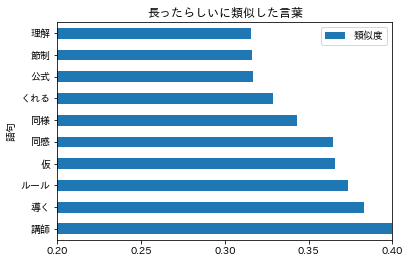

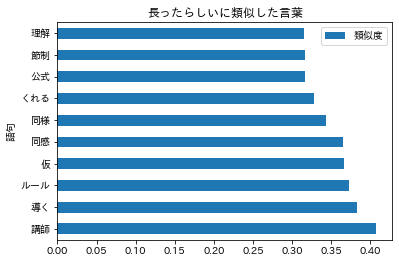

In [20]:
df.plot(title=word + 'に類似した言葉', kind='barh', xlim=[0.2, 0.4], xticks=[0.2, 0.25, 0.3, 0.35, 0.4], x="語句")
df.plot.barh(title=word + 'に類似した言葉', x="語句")

<AxesSubplot:title={'center':'微分＋覚えるに類似した言葉'}, ylabel='語句'>

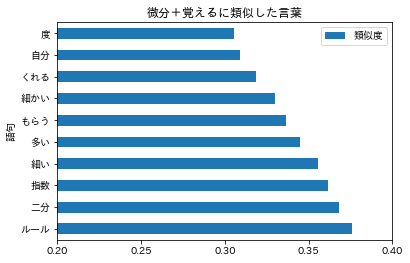

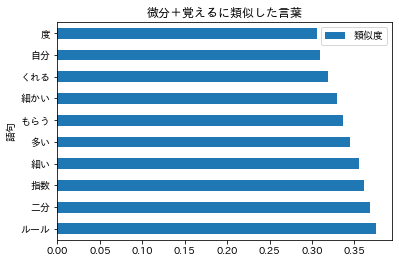

In [14]:
df.plot(title=word1 + '＋' + word2 + 'に類似した言葉', kind='barh', xlim=[0.2, 0.4], xticks=[0.2, 0.25, 0.3, 0.35, 0.4], x="語句")
df.plot.barh(title=word1 + '＋' + word2 + 'に類似した言葉', x="語句")